In [300]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [302]:
df= pd.read_excel("E:\DS Course\MRA Module\Cafe_Data_MRA.xlsx")
df.head()

,Date,Bill Number,Item Desc,Time,Quantity,Rate,Tax,Discount,Total,Category
0,2010-04-01,G0470115,QUA MINERAL WATER(1000ML),13:15:11,1,50.0,11.88,0.0,61.88,BEVERAGE
1,2010-04-01,G0470115,MONSOON MALABAR (AULAIT),13:15:11,1,100.0,23.75,0.0,123.75,BEVERAGE
2,2010-04-01,G0470116,MASALA CHAI CUTTING,13:17:35,1,40.0,9.50,0.0,49.50,BEVERAGE
3,2010-04-01,G0470117,QUA MINERAL WATER(1000ML),13:19:55,1,50.0,11.88,0.0,61.88,BEVERAGE
4,2010-04-01,G0470283,MOROCCAN MINT TEA,01:20:18,1,45.0,10.69,0.0,55.69,BEVERAGE


In [172]:
df.shape

(145830, 10)

In [310]:
df.duplicated().sum()

680

In [312]:
df[df.duplicated()]

,Date,Bill Number,Item Desc,Time,Quantity,Rate,Tax,Discount,Total,Category
198,2010-04-01,G0470211,B.M.T. PANINI,19:42:27,1,105.0,24.94,0.0,129.94,FOOD
199,2010-04-01,G0470211,B.M.T. PANINI,19:42:27,1,105.0,24.94,0.0,129.94,FOOD
244,2010-04-01,G0470270,B.M.T. PANINI,00:08:20,1,105.0,24.94,0.0,129.94,FOOD
551,2010-05-01,G0474965,PHILLYCREAM CHEESE &CHILLY PAN,13:33:51,1,105.0,24.94,0.0,129.94,FOOD
588,2010-05-01,G0475009,B.M.T. PANINI,17:12:21,1,105.0,24.94,0.0,129.94,FOOD
...,...,...,...,...,...,...,...,...,...,...
144615,2010-10-31,G0506562,DOPPIO,19:08:48,1,60.0,14.25,0.0,74.25,BEVERAGE
144727,2010-10-31,G0506566,CHEESE CAKE OF THE WEEK,19:20:52,1,105.0,24.94,0.0,129.94,FOOD
145129,2010-12-31,G0517963,CAPPUCCINO,20:50:13,1,60.0,14.25,0.0,74.25,BEVERAGE
145255,2010-12-31,G0517869,PHILLYCREAM CHEESE &CHILLY PAN,15:12:41,1,105.0,24.94,0.0,129.94,FOOD


In [320]:
df.drop(df[df.duplicated()].index,inplace=True,axis=0)

In [322]:
df.duplicated().sum()

0

In [324]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 145150 entries, 0 to 145829
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Date          145150 non-null  datetime64[ns]
 1   Bill Number   145150 non-null  object        
 2   Item Desc     145150 non-null  object        
 3   Time          145150 non-null  object        
 4   Quantity      145150 non-null  int64         
 5   Rate          145150 non-null  float64       
 6   Tax           145150 non-null  float64       
 7   Discount      145150 non-null  float64       
 8   Total         145150 non-null  float64       
 9   Category      145150 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(4)
memory usage: 12.2+ MB


In [326]:
df.describe(include='all').T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
Date,145150,NaN,NaN,NaN,2010-10-04 12:26:23.355149568,2010-04-01 00:00:00,2010-07-10 00:00:00,2010-10-07 00:00:00,2011-01-01 00:00:00,2011-03-31 00:00:00,NaN
Bill Number,145150,69982,G0490530,23,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item Desc,145150,580,NIRVANA HOOKAH SINGLE,8392,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Time,145150,36200,22:25:36,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Quantity,145150.0,NaN,NaN,NaN,1.121826,1.0,1.0,1.0,1.0,30.0,0.478249
Rate,145150.0,NaN,NaN,NaN,161.727783,0.01,95.0,125.0,225.0,2100.0,102.213514
Tax,145150.0,NaN,NaN,NaN,48.93175,0.0,22.56,32.06,72.0,2731.25,40.28672
Discount,145150.0,NaN,NaN,NaN,0.095307,0.0,0.0,0.0,0.0,825.0,3.728524
Total,145150.0,NaN,NaN,NaN,224.971683,0.01,117.56,167.06,315.0,14231.25,165.052799
Category,145150,9,FOOD,56658,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [175]:
df['Date']=pd.to_datetime(df['Date'])
df['datetime'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Time'].astype(str))
df.set_index("datetime", inplace=True)
df.drop(columns=["Date","Time"], inplace=True)

In [176]:
df.head()

,Bill Number,Item Desc,Quantity,Rate,Tax,Discount,Total,Category
datetime,,,,,,,,
2010-04-01 13:15:11,G0470115,QUA MINERAL WATER(1000ML),1,50.0,11.88,0.0,61.88,BEVERAGE
2010-04-01 13:15:11,G0470115,MONSOON MALABAR (AULAIT),1,100.0,23.75,0.0,123.75,BEVERAGE
2010-04-01 13:17:35,G0470116,MASALA CHAI CUTTING,1,40.0,9.50,0.0,49.50,BEVERAGE
2010-04-01 13:19:55,G0470117,QUA MINERAL WATER(1000ML),1,50.0,11.88,0.0,61.88,BEVERAGE
2010-04-01 01:20:18,G0470283,MOROCCAN MINT TEA,1,45.0,10.69,0.0,55.69,BEVERAGE


In [271]:
df["TimeStamp"]=df.index
df.to_excel("cafe_sales.xlsx", index=False)

In [273]:
df.head()

,Bill Number,Item Desc,Quantity,Rate,Tax,Discount,Total,Category,TimeStamp
datetime,,,,,,,,,
2010-04-01 13:15:11,G0470115,QUA MINERAL WATER(1000ML),1,50.0,11.88,0.0,61.88,BEVERAGE,2010-04-01 13:15:11
2010-04-01 13:15:11,G0470115,MONSOON MALABAR (AULAIT),1,100.0,23.75,0.0,123.75,BEVERAGE,2010-04-01 13:15:11
2010-04-01 13:17:35,G0470116,MASALA CHAI CUTTING,1,40.0,9.50,0.0,49.50,BEVERAGE,2010-04-01 13:17:35
2010-04-01 13:19:55,G0470117,QUA MINERAL WATER(1000ML),1,50.0,11.88,0.0,61.88,BEVERAGE,2010-04-01 13:19:55
2010-04-01 01:20:18,G0470283,MOROCCAN MINT TEA,1,45.0,10.69,0.0,55.69,BEVERAGE,2010-04-01 01:20:18


In [177]:
df.Category.value_counts()

Category
FOOD                57023
BEVERAGE            43573
TOBACCO             36496
LIQUOR               6200
MISC                 1187
WINES                 809
MERCHANDISE           487
LIQUOR & TOBACCO       54
LIQUOR                  1
Name: count, dtype: int64

In [336]:
df[df["Category"]=="LIQUOR"]

,Date,Bill Number,Item Desc,Time,Quantity,Rate,Tax,Discount,Total,Category
258,2010-04-01,N0027835,CARLSBERG,13:37:13,1,120.0,37.50,0.0,157.50,LIQUOR
259,2010-04-01,N0027836,CARLSBERG,13:55:17,1,120.0,37.50,0.0,157.50,LIQUOR
260,2010-04-01,N0027837,TUBORG,15:30:42,2,100.0,62.50,0.0,262.50,LIQUOR
261,2010-04-01,N0027838,TUBORG,16:16:40,1,100.0,31.25,0.0,131.25,LIQUOR
262,2010-04-01,N0027840,CARLSBERG,18:57:51,1,120.0,37.50,0.0,157.50,LIQUOR
...,...,...,...,...,...,...,...,...,...,...
145825,2010-05-22,N0028716,ZINZI WHITE (GLS),21:43:55,2,150.0,78.00,0.0,378.00,LIQUOR
145826,2010-04-27,N0028343,ZINZI WHITE (GLS),20:52:11,2,150.0,78.00,0.0,378.00,LIQUOR
145827,2010-05-28,N0028835,ZINZI WHITE (GLS),01:03:37,3,150.0,117.00,0.0,567.00,LIQUOR
145828,2010-04-30,N0028399,ZINZI WHITE (GLS),23:44:37,1,150.0,39.00,0.0,189.00,LIQUOR


Category distribution

C:\Users\jayee\AppData\Local\Temp\ipykernel_17096\2260078373.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




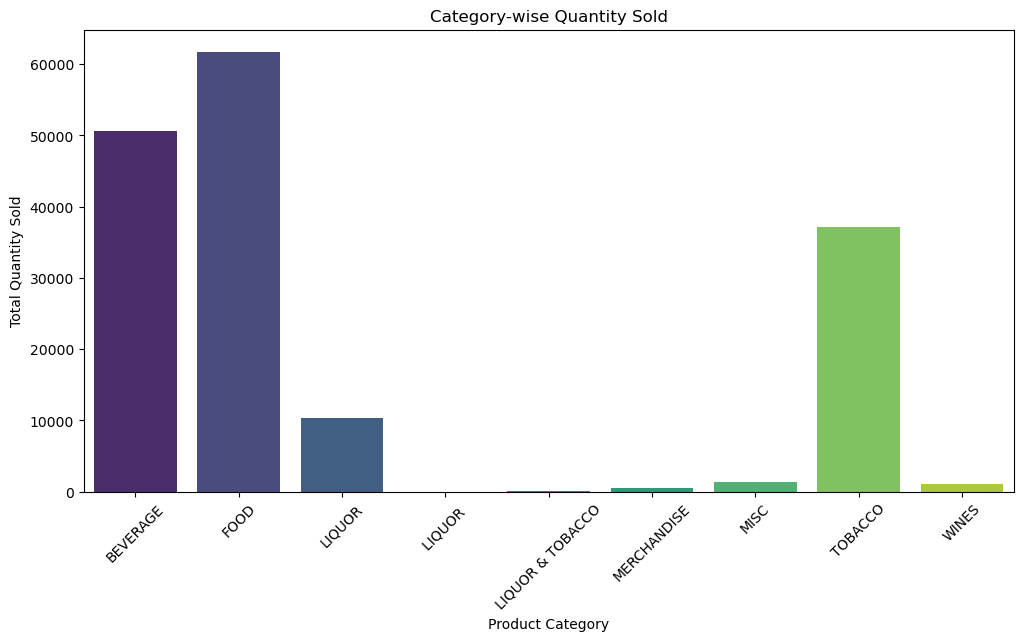

In [338]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df.groupby('Category')['Quantity'].sum().reset_index(), x='Category', y='Quantity', palette='viridis')
plt.title('Category-wise Quantity Sold')
plt.xlabel('Product Category')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)  # Rotate the category labels for better readability
plt.show()

Rate distribution of each category

C:\Users\jayee\AppData\Local\Temp\ipykernel_17096\3167579544.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Figure size 1200x600 with 0 Axes>

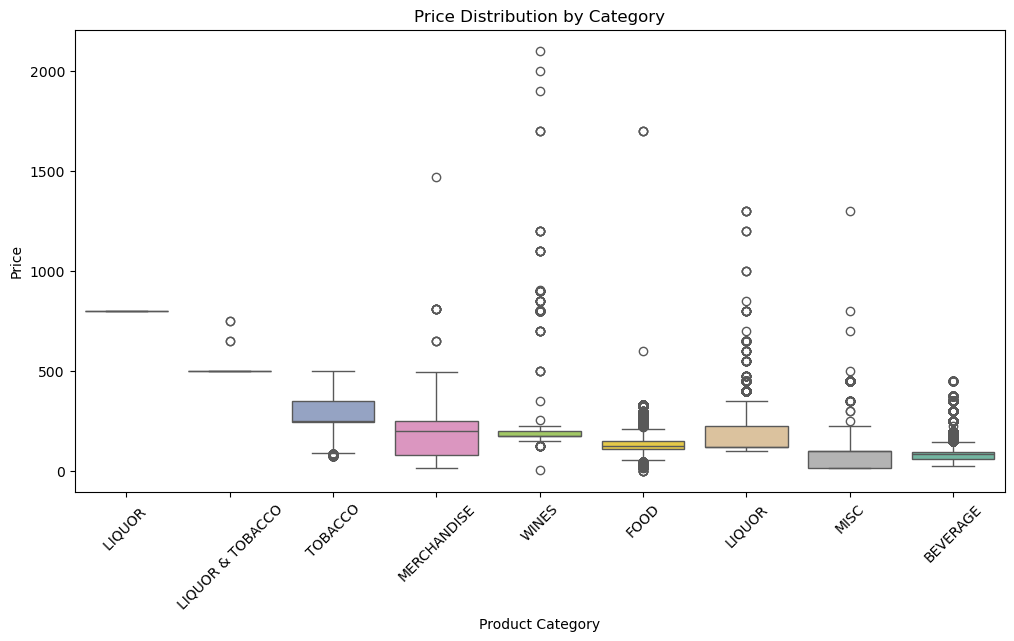

In [346]:
plt.figure(figsize=(12, 6))
order = df.groupby('Category')['Rate'].median().sort_values(ascending=False).index

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Category', y='Rate', palette='Set2', order=order)
plt.title('Price Distribution by Category')
plt.xlabel('Product Category')
plt.ylabel('Price')
plt.xticks(rotation=45)  # Rotate the category labels for readability
plt.show()

Monthly Trend of Sales

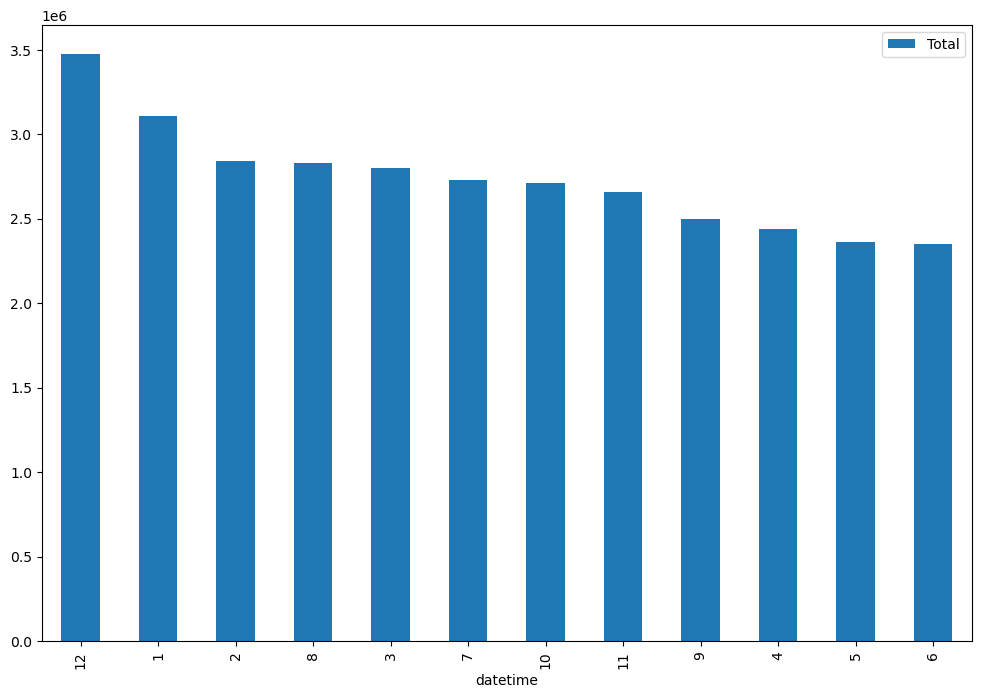

In [183]:
plt.figure(figsize=(12,8))
df.groupby(df.index.month)["Total"].sum().sort_values(ascending=False).plot(kind="bar")
plt.legend(loc="best")

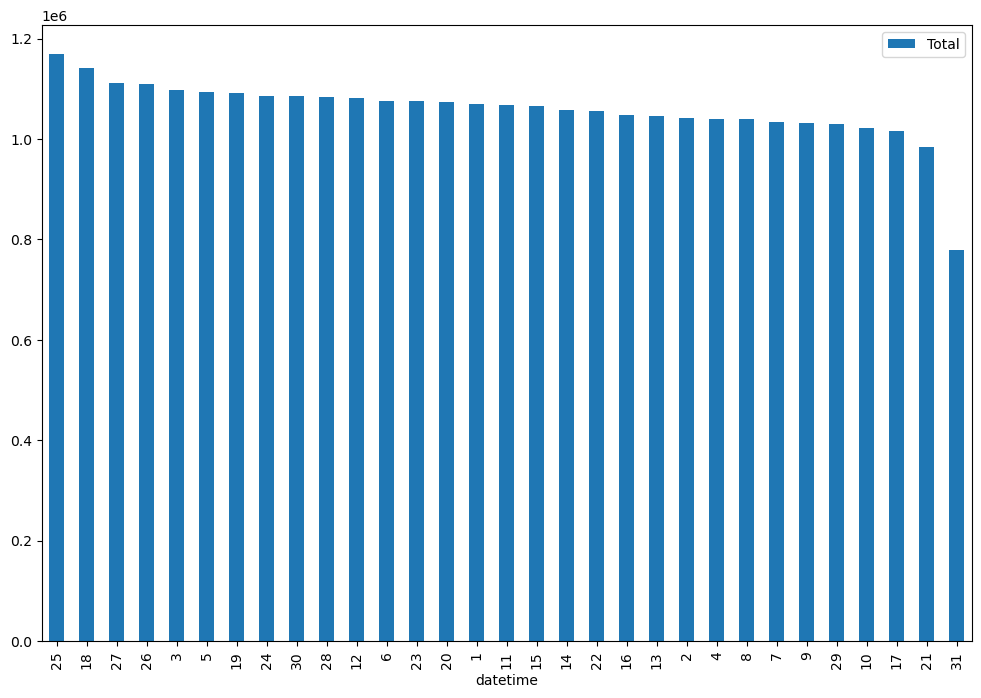

In [184]:
plt.figure(figsize=(12,8))
df.groupby(df.index.day)["Total"].sum().sort_values(ascending=False).plot(kind="bar")
plt.legend(loc="best")

In [185]:
df_copy=df.copy()

In [186]:
df_copy['hour']= df.index.hour

Hourly Trend of Customer Dehavior over a day

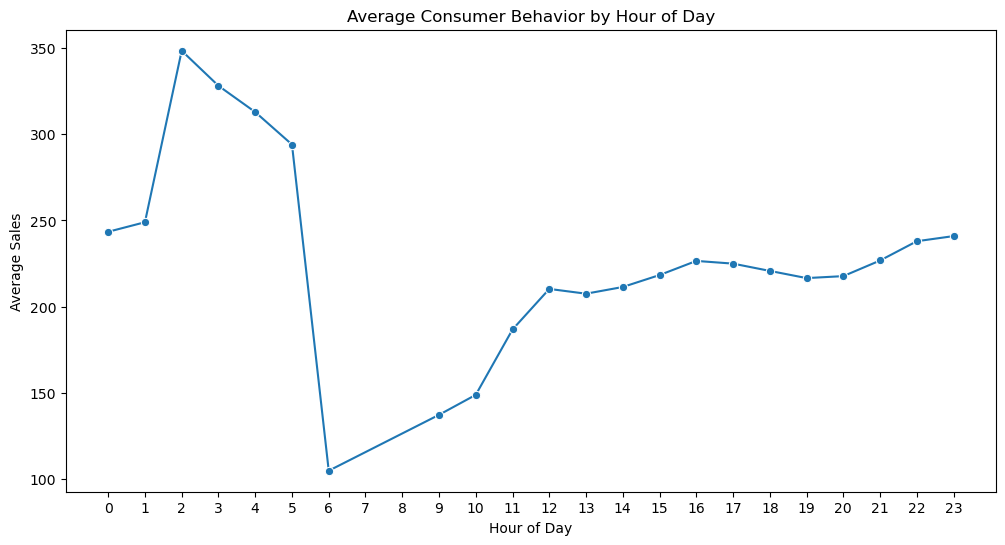

In [188]:
hourly_behavior_avg = df_copy.groupby('hour')['Total'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_behavior_avg, x='hour', y='Total', marker='o')
plt.title('Average Consumer Behavior by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Sales')
plt.xticks(range(0, 24))  # Set x-axis to show each hour
plt.show()

Understand the consumer behavior from avg sales pattern over the hours in a day

In [190]:
hourly_category_sales = df_copy.groupby(['hour', 'Category'])['Total'].mean().reset_index()

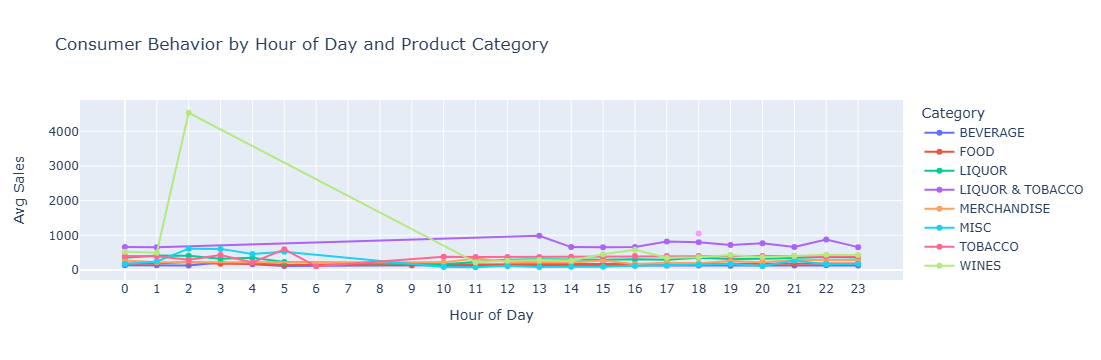

In [191]:
import plotly.express as px

# Assuming 'hourly_category_sales' is your data frame
fig = px.line(hourly_category_sales, x='hour', y='Total', color='Category', 
              markers=True, title='Consumer Behavior by Hour of Day and Product Category')

# Update axis labels
fig.update_layout(
    xaxis_title="Hour of Day",
    yaxis_title="Avg Sales",
    xaxis=dict(tickmode='array', tickvals=list(range(0, 24)))  # Show each hour on x-axis
)

# Show the interactive plot
fig.show()

In [192]:
hourly_category_sales_quantity_avg = df_copy.groupby(['hour', 'Category'])['Quantity'].mean().reset_index()

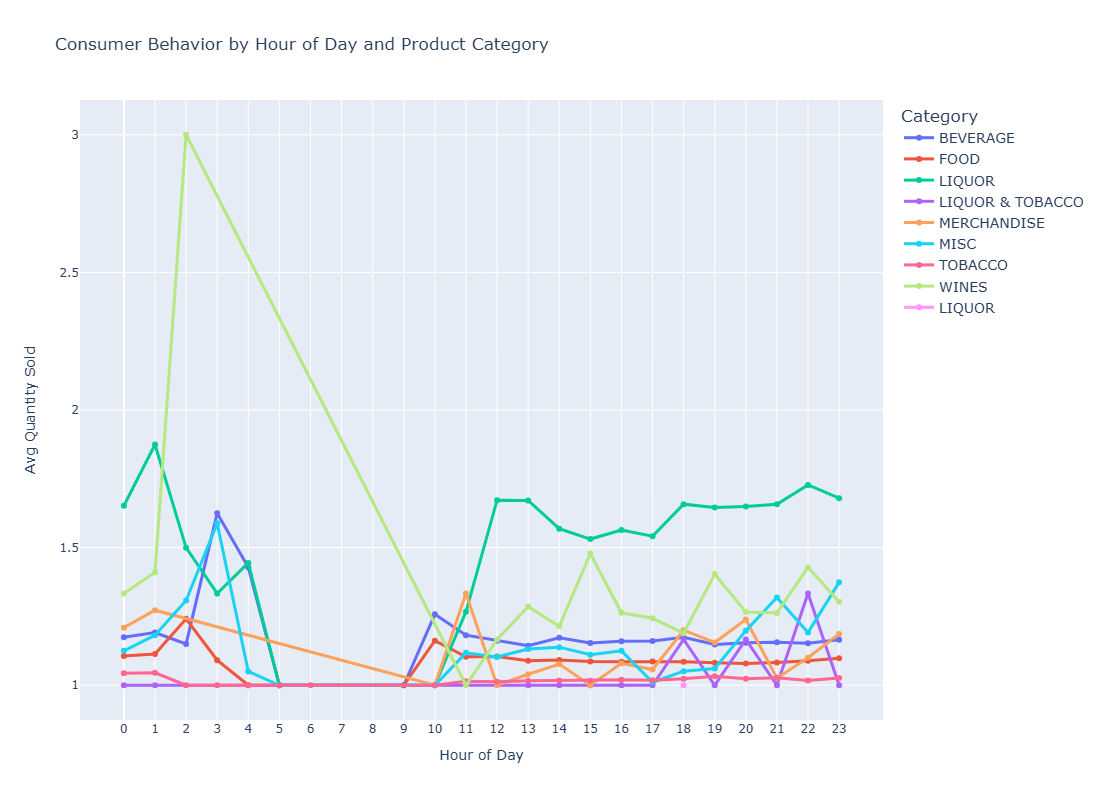

In [193]:
import plotly.express as px

# Assuming 'hourly_category_sales' is your data frame
fig = px.line(hourly_category_sales_quantity_avg, x='hour', y='Quantity', color='Category', 
              markers=True, title='Consumer Behavior by Hour of Day and Product Category')

# Update axis labels
fig.update_layout(
    xaxis_title="Hour of Day",
    yaxis_title="Avg Quantity Sold",
    xaxis=dict(tickmode='array', tickvals=list(range(0, 24)))  # Show each hour on x-axis
)

# Add event listener for clickable legend (toggle lines)
fig.update_traces(
    line=dict(width=3),  # Make the lines thicker for better visibility
    selector=dict(mode='lines+markers')  # Only add interactivity to lines and markers
)

# Enable the legend click behavior
fig.update_layout(
    showlegend=True,
    legend_title='Category',
    width=1000,  # Width of the plot
    height=800,  # Height of the plot
    legend=dict(font=dict(size=14)) 
)

# Show the interactive plot
fig.show()

Understand the demand of each category item over the hours in a day

In [195]:
hourly_category_sales_quantity = df_copy.groupby(['hour', 'Category'])['Quantity'].sum().reset_index()

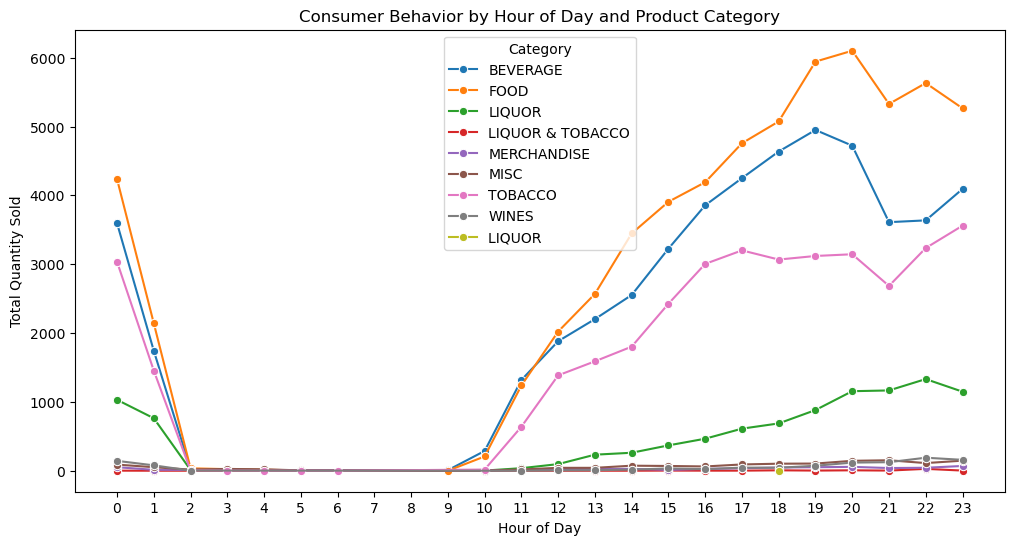

In [196]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_category_sales_quantity, x='hour', y='Quantity', hue='Category', marker='o')
plt.title('Consumer Behavior by Hour of Day and Product Category')
plt.xlabel('Hour of Day')
plt.ylabel('Total Quantity Sold')
plt.xticks(range(0, 24))  # Show each hour on x-axis
plt.legend(title='Category')
plt.show()

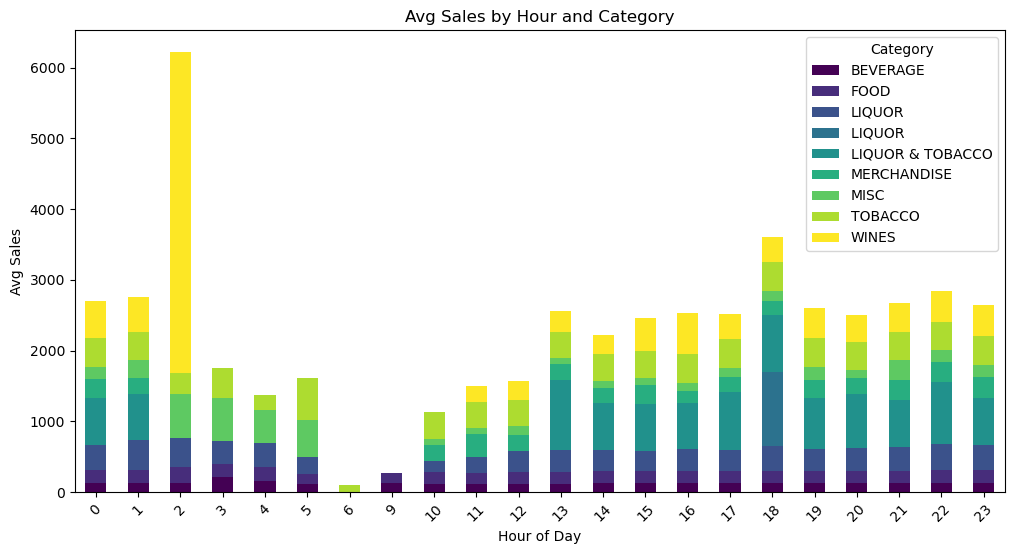

In [197]:
hourly_pivot = hourly_category_sales.pivot(index='hour', columns='Category', values='Total').fillna(0)

# Plot the stacked bar chart
hourly_pivot.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.title('Avg Sales by Hour and Category')
plt.xlabel('Hour of Day')
plt.ylabel('Avg Sales')
plt.xticks(rotation=45)
plt.legend(title='Category')
plt.show()

Day wise Sales Pattern over a week

In [237]:
df_copy["Day"]=df_copy.index.day_name()

In [267]:
avg_sales = df_copy.groupby(['Day','Category'])['Total'].mean().reset_index()


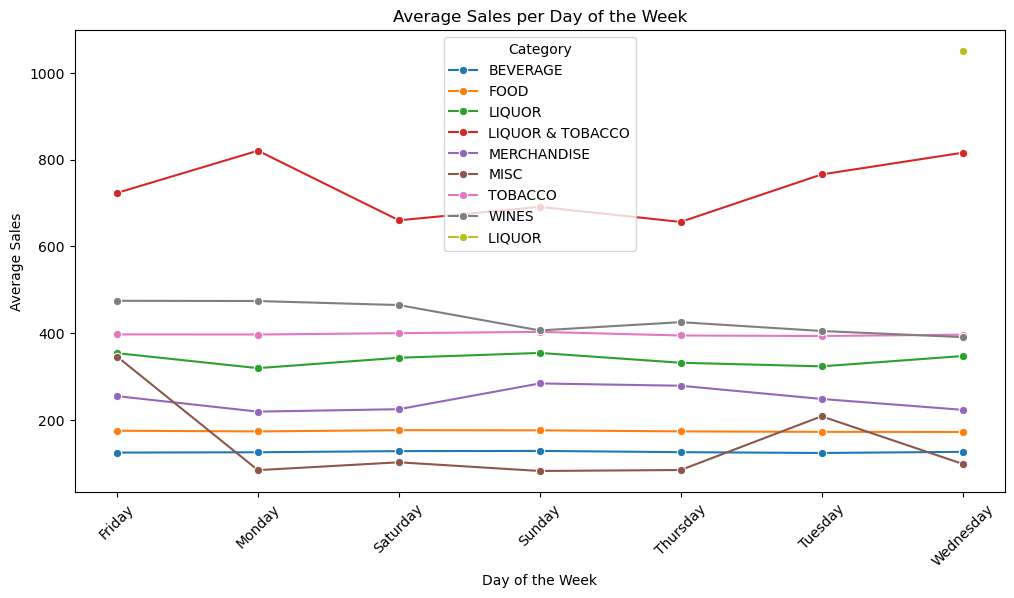

In [269]:
# Plot the average sales per day
plt.figure(figsize=(12, 6))
sns.lineplot(data=avg_sales, x='Day', y='Total',hue="Category", marker='o')

# Customize the plot
plt.title('Average Sales per Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Sales')
plt.xticks(rotation=45)
plt.show()

In [285]:
df_copy["Month"]=df_copy.index.month_name()
df_copy.head()

,Bill Number,Item Desc,Quantity,Rate,Tax,Discount,Total,Category,hour,Day,Week,Month
datetime,,,,,,,,,,,,
2010-04-01 13:15:11,G0470115,QUA MINERAL WATER(1000ML),1,50.0,11.88,0.0,61.88,BEVERAGE,13,Thursday,3,April
2010-04-01 13:15:11,G0470115,MONSOON MALABAR (AULAIT),1,100.0,23.75,0.0,123.75,BEVERAGE,13,Thursday,3,April
2010-04-01 13:17:35,G0470116,MASALA CHAI CUTTING,1,40.0,9.50,0.0,49.50,BEVERAGE,13,Thursday,3,April
2010-04-01 13:19:55,G0470117,QUA MINERAL WATER(1000ML),1,50.0,11.88,0.0,61.88,BEVERAGE,13,Thursday,3,April
2010-04-01 01:20:18,G0470283,MOROCCAN MINT TEA,1,45.0,10.69,0.0,55.69,BEVERAGE,1,Thursday,3,April


In [293]:
df_copy["TimeStamp"]=df_copy.index
df_copy.to_excel("cafe_sale.xlsx",index=False)

In [297]:
df_copy.hour.value_counts()

hour
20    13785
19    13559
23    12753
22    12567
18    12218
17    11745
21    11618
0     10658
16    10530
15     9125
14     7380
13     6061
1      5295
12     4947
11     2927
10      438
2        77
3        64
4        54
5        18
9        10
6         1
Name: count, dtype: int64